In [371]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk

PATH_TRAIN = "diagnostico2.csv"

df_train = pd.read_csv(PATH_TRAIN,encoding = 'utf8',header = 0)

In [372]:
print(df_train.head())

  Carimbo de data/hora  2. Matrícula na UnB Disciplina/Turma  \
0  19/09/2020 20:52:36            130130834              APC   
1  16/09/2020 20:42:42            150029749              APC   
2  19/09/2020 22:18:37            150153538              APC   
3  18/09/2020 18:37:54            170023664              APC   
4  18/09/2020 14:11:17            180042785              APC   

  Chave de pesquisa  \
0     130130834 APC   
1     150029749 APC   
2     150153538 APC   
3     170023664 APC   
4     180042785 APC   

   O professor apresentou o plano de ensino de maneira clara e coerente com a ementa.  \
0                                                  3                                    
1                                                  5                                    
2                                                  3                                    
3                                                  3                                    
4                              

In [373]:
print(df_train.shape)

(734, 14)


In [374]:
dados = df_train[['Disciplina/Turma','Dificuldades ou problemas da disciplina/turma']]

In [375]:
dados = dados.dropna()

print(dados)

                                      Disciplina/Turma  \
3                                                  APC   
6                                                  APC   
9                                                  APC   
15                                                 APC   
18                                                 APC   
..                                                 ...   
727  TRADUTORES (GRADUAÇÃO) - Turma A - CLAUDIA NAL...   
729  TRANSMISSÃO DE DADOS (GRADUAÇÃO) - Turma A - M...   
730  TRANSMISSÃO DE DADOS (GRADUAÇÃO) - Turma A - M...   
732  TRANSMISSÃO DE DADOS (GRADUAÇÃO) - Turma A - M...   
733  TRANSMISSÃO DE DADOS (GRADUAÇÃO) - Turma A - M...   

         Dificuldades ou problemas da disciplina/turma  
3    Marquei para finalizar e está me perguntando s...  
6                     Prazo de entregas das atividades  
9    Não tenho conseguido me adaptar muito com a di...  
15    não há. os alunos são participativos e educados.  
18   Muitas vezes 

In [385]:
alunosapc = dados['Disciplina/Turma'] == 'APC'

alunosed = dados['Disciplina/Turma'] == 'ED'

somenteapc = dados[alunosapc]

somenteed = dados[alunosed]

print(somenteed)

comments_apc = somenteapc[['Dificuldades ou problemas da disciplina/turma']]
comments_ed = somenteed[['Dificuldades ou problemas da disciplina/turma']]

#comments = dados[['Dificuldades ou problemas da disciplina/turma']]

#print(comments_apc.head())

comments_apc.shape
comments_ed.shape

    Disciplina/Turma      Dificuldades ou problemas da disciplina/turma
213               ED                      Não houve problemas até agora
218               ED                                             Nenhum
221               ED  Dificuldade com a mudança da linguagem para Py...
223               ED                                Não tive problemas.
224               ED                                    Não tive ainda.
226               ED  Dificuldade na assimilação do conteúdo no que ...
227               ED                                           Nenhuma 
237               ED  Sinto falta das aulas síncronas, com foco em t...
239               ED  so teve uma aula que a internet estava ruim. d...
242               ED                   Acompanhar as aulas e Atividades
245               ED  Tenho problemas para os estudos devido a vida ...
247               ED                          poucos recursos sincronos
249               ED  Dificuldade em manter e entregar os prazos

(14, 1)

In [386]:
def remove_stopwords(corpus, stopword_list):
    ls = []
    
    for sentence in corpus:
        
        #print(sentence)
        
        sentence = list(sentence)[0]
        #sentence_tokens = sentence_tokens.split()
        
        sentence_tokens = sentence.split()
        
        new_tokens = str()
        
        for word in sentence_tokens:

            if word.lower() not in stopword_list:
                new_tokens=new_tokens+" "+word 
        
        if(len(new_tokens) > 3):
            ls.append(new_tokens)
        
    return ls

In [387]:
def handle_stopwords(comments):
    
    stopword_list = []
    # get nltk portuguese stopwords
    nltk_stopwords = nltk.corpus.stopwords.words('portuguese')
    # list of array
    text = comments.values.tolist()

    irrelevantwords = ["também","matéria","atividade","parece", "disciplina"," aluno"," aluno ", "aluno ","aluno","aula","aulas","professor"]

    # You can also add stopwords manually instead of loading from the database. Generally, we add stopwords that belong
    for word in irrelevantwords:
        stopword_list.append(word)

    stopword_list.extend(nltk_stopwords)
    stopword_list.extend(custom_stopwords)

    stopword_list = list(set(stopword_list))

    comments_tokens = remove_stopwords(text, stopword_list)

    return comments_tokens

In [392]:
comments_apc_tokens = handle_stopwords(comments_apc)

comments_ed_tokens = handle_stopwords(comments_ed)

In [393]:
tokens_apc = str()

for sentence in comments_apc_tokens:
    res = sentence.split()
    for word in res:
        tokens_apc=tokens_apc+" "+word

tokens_ed = str()

for sentence in comments_ed_tokens:
    res = sentence.split()
    for word in res:
        tokens_ed=tokens_ed+" "+word

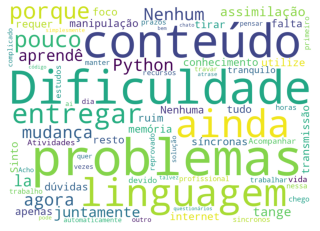

In [394]:
#wordcloud = WordCloud().generate(list(apc)

wordcloud = WordCloud(background_color = 'white',
                    width = 1024,
                    height = 728).generate(tokens_ed)
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('Plotly-World_Cloud.png')
plt.show()

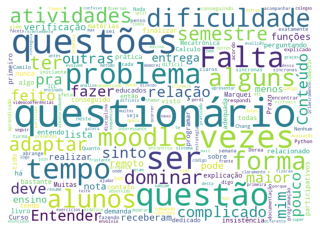

In [395]:
#wordcloud = WordCloud().generate(list(apc)

wordcloud = WordCloud(background_color = 'white',
                    width = 1024,
                    height = 728).generate(tokens_apc)
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('Plotly-World_Cloud.png')
plt.show()

### Get all categories from data frame

In [396]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

### ED


In [397]:
tf_vectorizer = CountVectorizer(ngram_range=(1,1),max_df=0.95,min_df=2)

tf = tf_vectorizer.fit_transform(comments_ed_tokens)

lda = LatentDirichletAllocation(n_components=8, max_iter=5,
                                learning_method='online',
                                learning_offset=100.,
                                random_state=0)
lda.fit(tf)

print("\nTopicos extraidos do modelo LDA")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, 10)


Topicos extraidos do modelo LDA
Topic #0: dificuldade ainda conteúdo problemas linguagem
Topic #1: conteúdo linguagem ainda problemas dificuldade
Topic #2: problemas ainda linguagem conteúdo dificuldade
Topic #3: conteúdo dificuldade linguagem ainda problemas
Topic #4: ainda conteúdo problemas dificuldade linguagem
Topic #5: problemas dificuldade ainda linguagem conteúdo
Topic #6: conteúdo ainda linguagem dificuldade problemas
Topic #7: linguagem dificuldade problemas conteúdo ainda



### Count the number of instancer per category

In [398]:
tf_vectorizer = CountVectorizer(ngram_range=(1,1),max_df=0.95,min_df=2)

tf = tf_vectorizer.fit_transform(comments_apc_tokens)

lda = LatentDirichletAllocation(n_components=8, max_iter=5,
                                learning_method='online',
                                learning_offset=100.,
                                random_state=0)
lda.fit(tf)

print("\nTopicos extraidos do modelo LDA")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, 10)


Topicos extraidos do modelo LDA
Topic #0: mim alunos adaptar outras conteúdo problemas falta maior ter sinto
Topic #1: relação questionários feito deve ser questão vezes ter outras mim
Topic #2: atividades moodle questionários adaptar problemas alguns pouco maior relação sinto
Topic #3: entender questionário falta forma pode vezes maior adaptar deve questões
Topic #4: tempo questionários falta alguns pode forma questões semestre complicado moodle
Topic #5: falta questão pouco pra deve questionários alguns mim ter feito
Topic #6: vezes complicado fazer ter moodle pouco verificação pode pra questionários
Topic #7: questões questão vezes ser alguns questionário questionários alunos entender fazer

